## RESPOSTA ATIVIDADE 02 MÓDULO 14

Ano-Mês detectado: 2019-02
Pasta criada: ./output/figs/2019-02


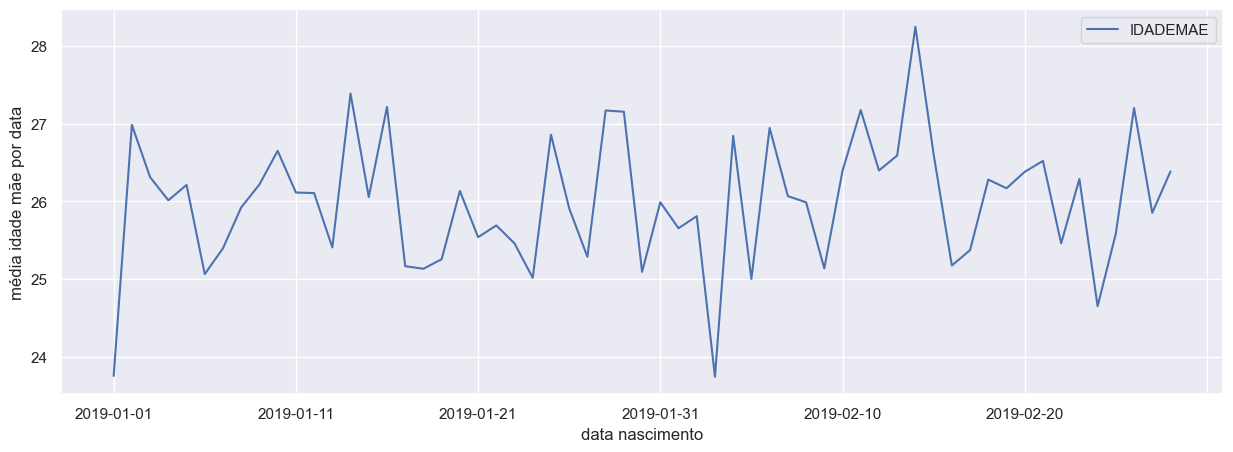

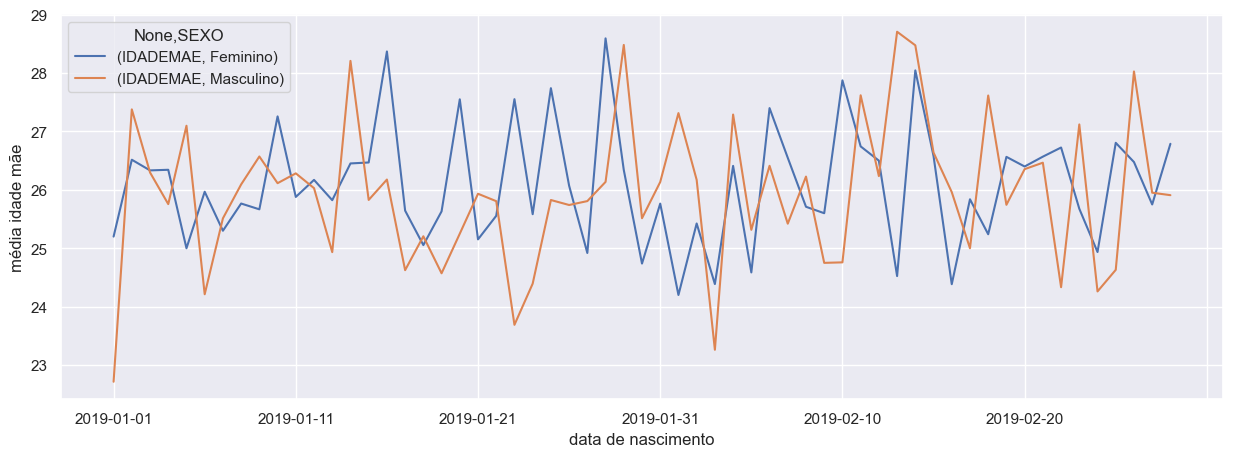

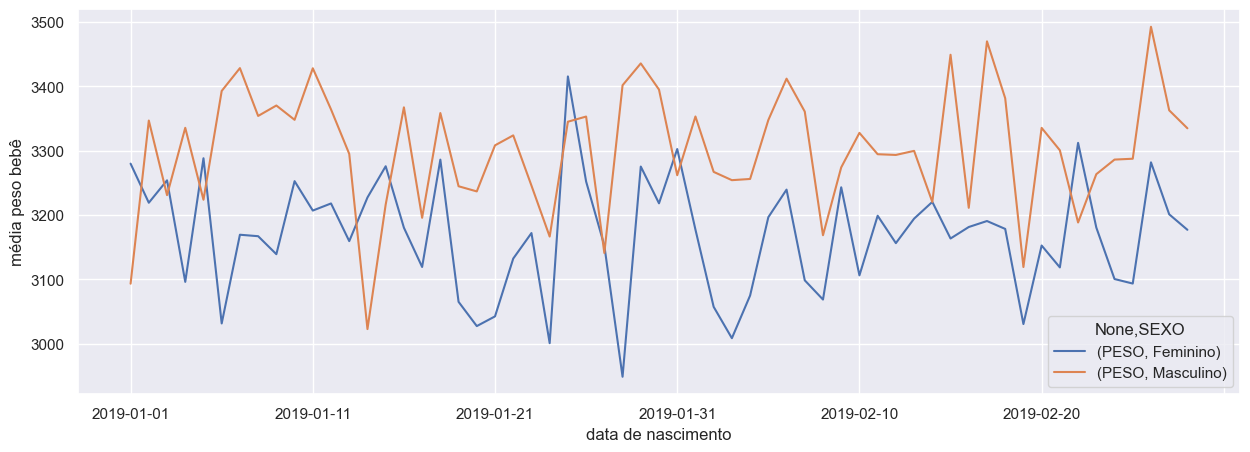

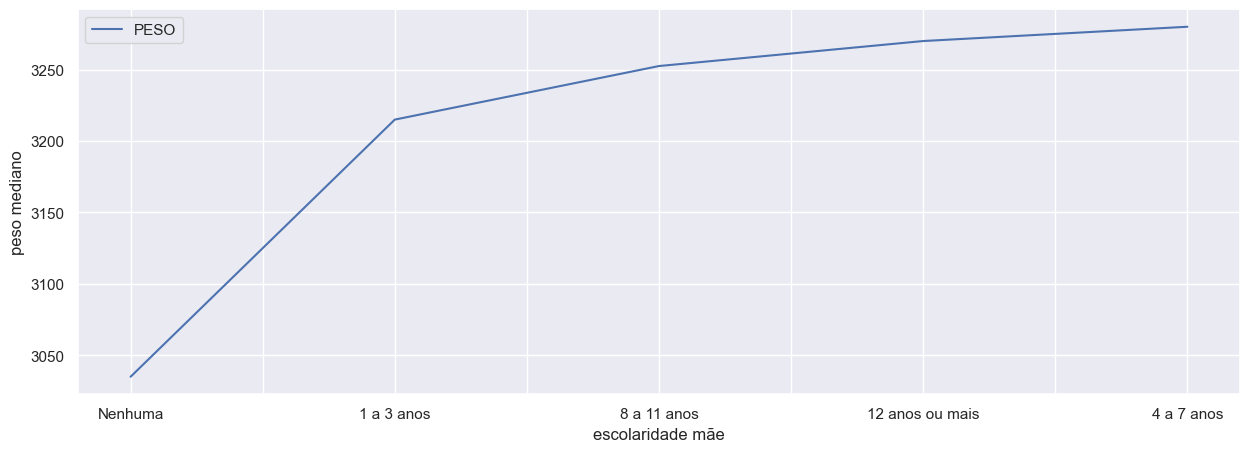

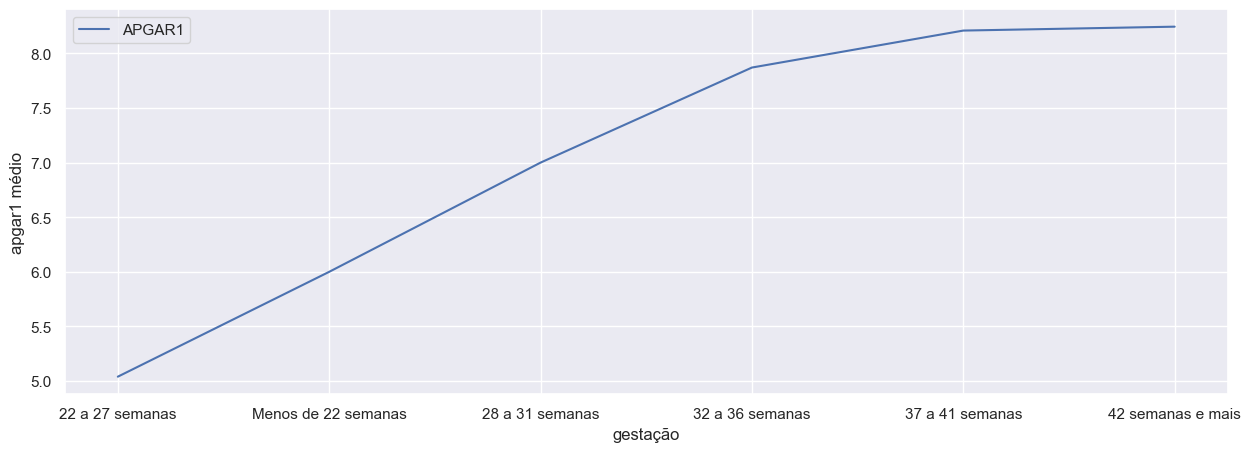

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

sns.set()
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
# Altere o caminho conforme sua estrutura de pastas
sinasc = pd.read_csv('SINASC_RO_2019_FEV.csv')

sinasc.head()

# Pega o ano-mês máximo para nomear a pasta
max_data = sinasc.DTNASC.max()[:7]
print(f"Ano-Mês detectado: {max_data}")

# Criando pasta de saída
output_dir = f'./output/figs/{max_data}'
os.makedirs(output_dir, exist_ok=True)
print(f"Pasta criada: {output_dir}")

plota_pivot_table(
    sinasc, 'IDADEMAE', 'DTNASC', 'mean',
    'média idade mãe por data', 'data nascimento'
)
plt.show()
plt.savefig(f'{output_dir}/media_idade_mae_por_data.png')
plt.close()

plota_pivot_table(
    sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean',
    'média idade mãe', 'data de nascimento', 'unstack'
)
plt.show()
plt.savefig(f'{output_dir}/media_idade_mae_por_sexo.png')
plt.close()

plota_pivot_table(
    sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean',
    'média peso bebê', 'data de nascimento', 'unstack'
)
plt.show()
plt.savefig(f'{output_dir}/media_peso_bebe_por_sexo.png')
plt.close()

plota_pivot_table(
    sinasc, 'PESO', 'ESCMAE', 'median',
    'peso mediano', 'escolaridade mãe', 'sort'
)
plt.show()
plt.savefig(f'{output_dir}/peso_mediano_por_escolaridade_mae.png')
plt.close()

plota_pivot_table(
    sinasc, 'APGAR1', 'GESTACAO', 'mean',
    'apgar1 médio', 'gestação', 'sort'
)
plt.show()
plt.savefig(f'{output_dir}/media_apgar1_por_gestacao.png')
plt.close()


Diretório criado: 2019-03


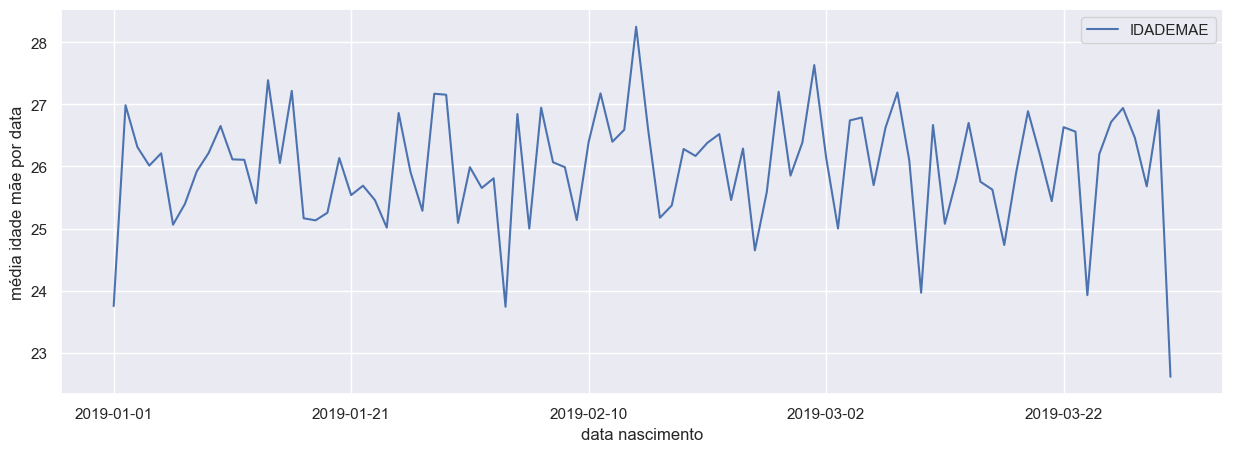

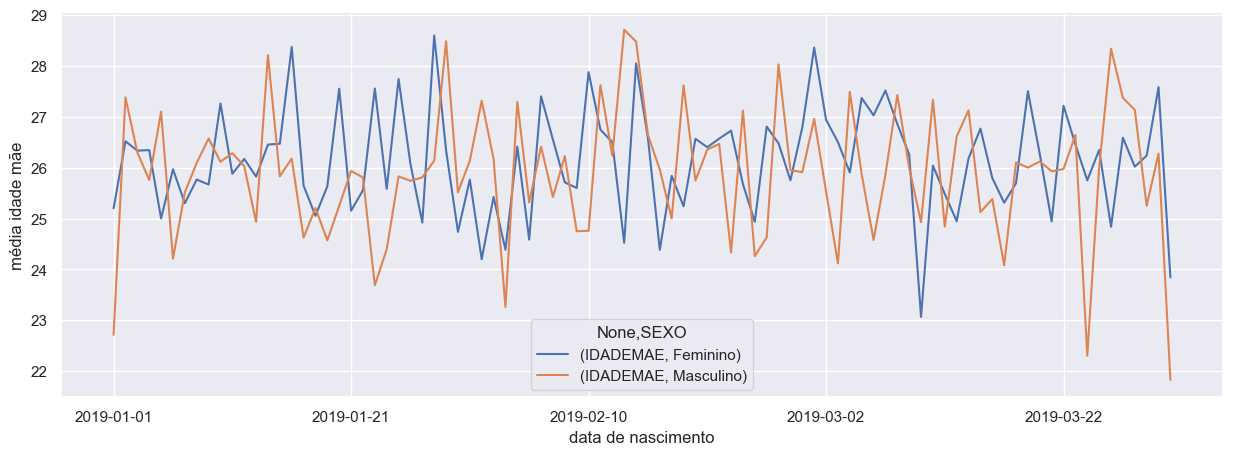

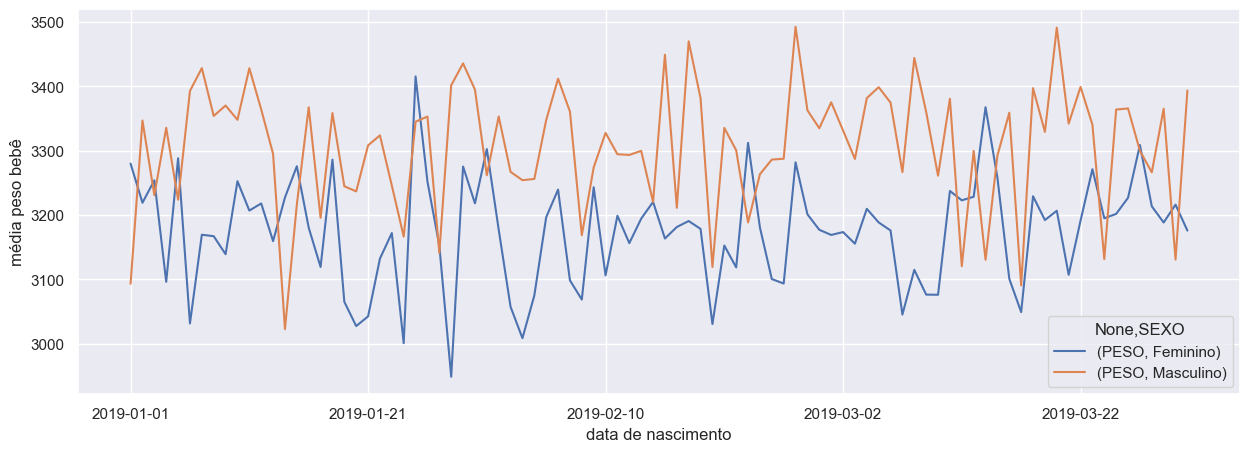

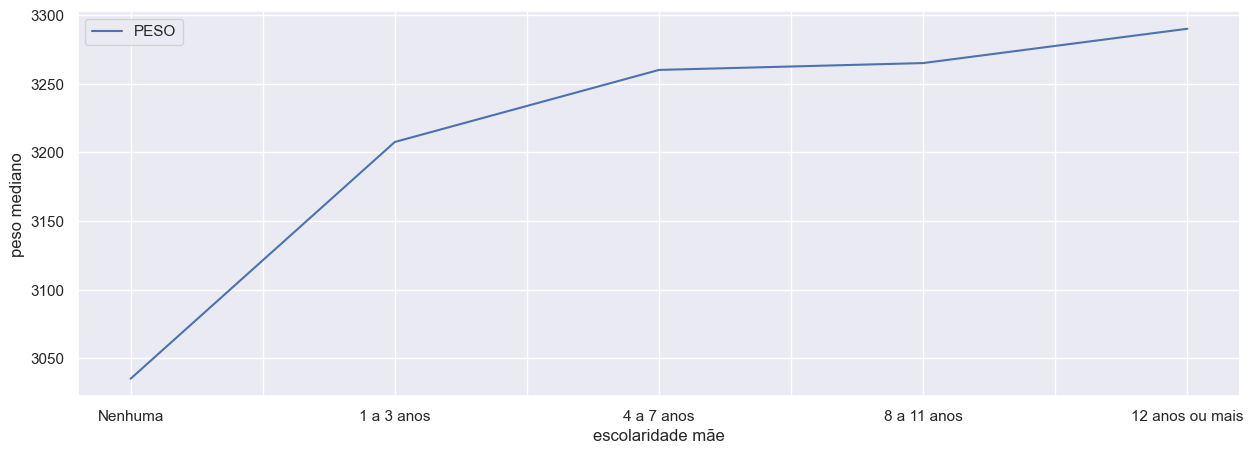

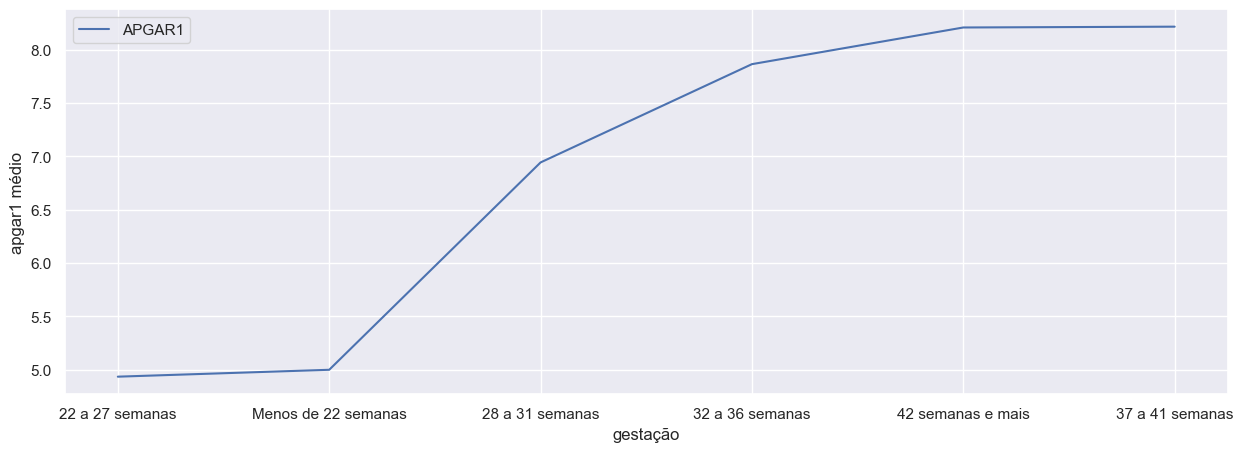

Diretório criado: 2019-04


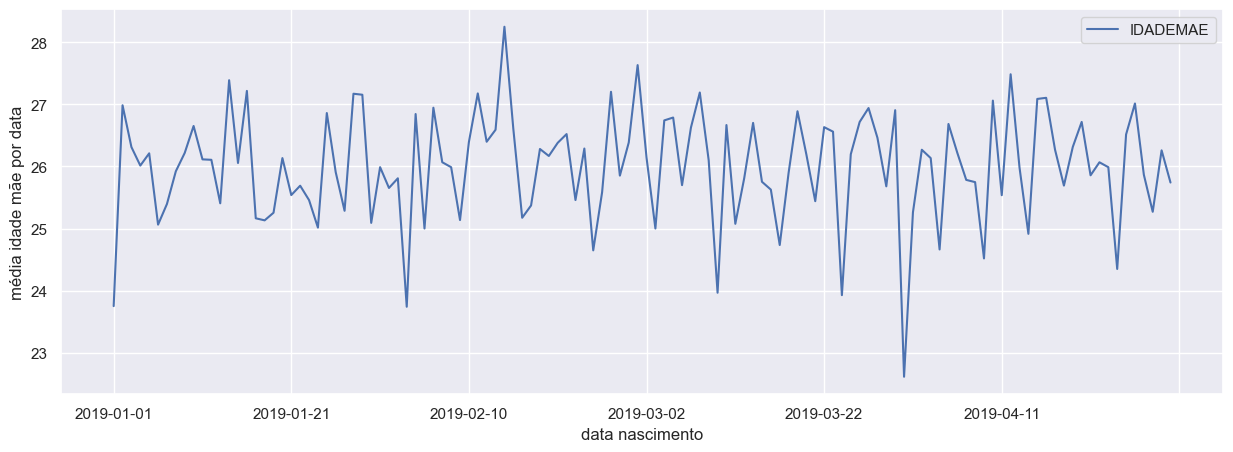

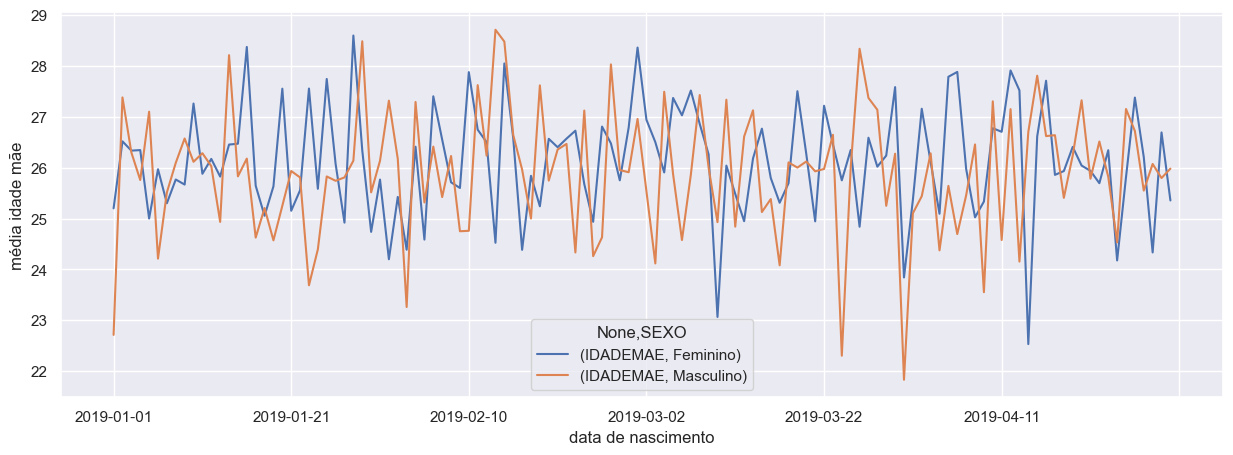

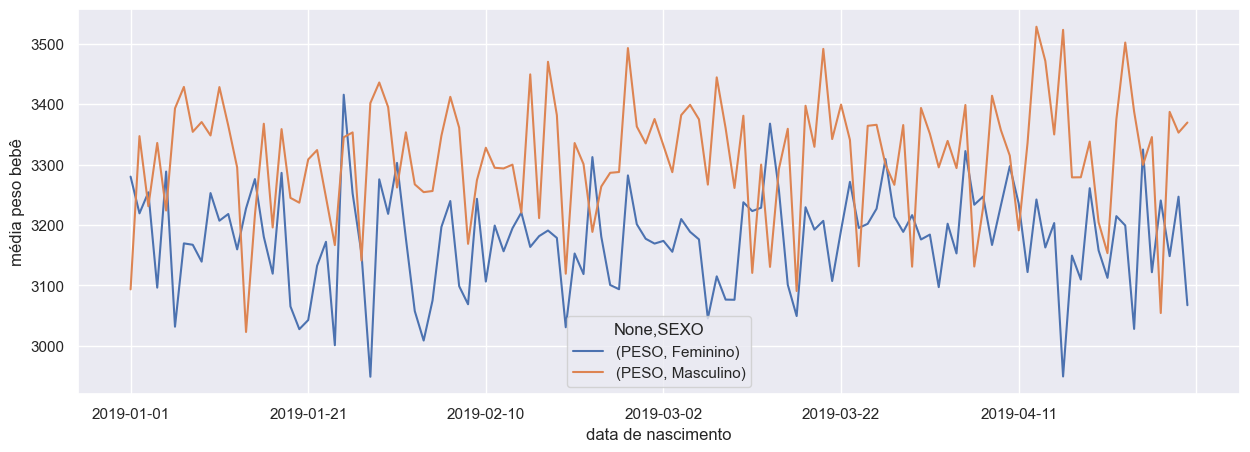

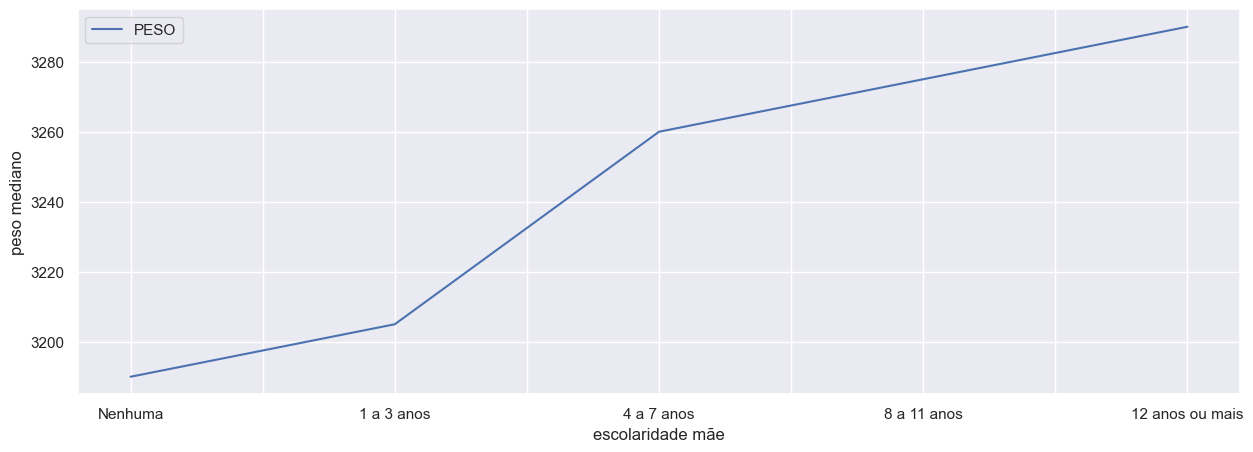

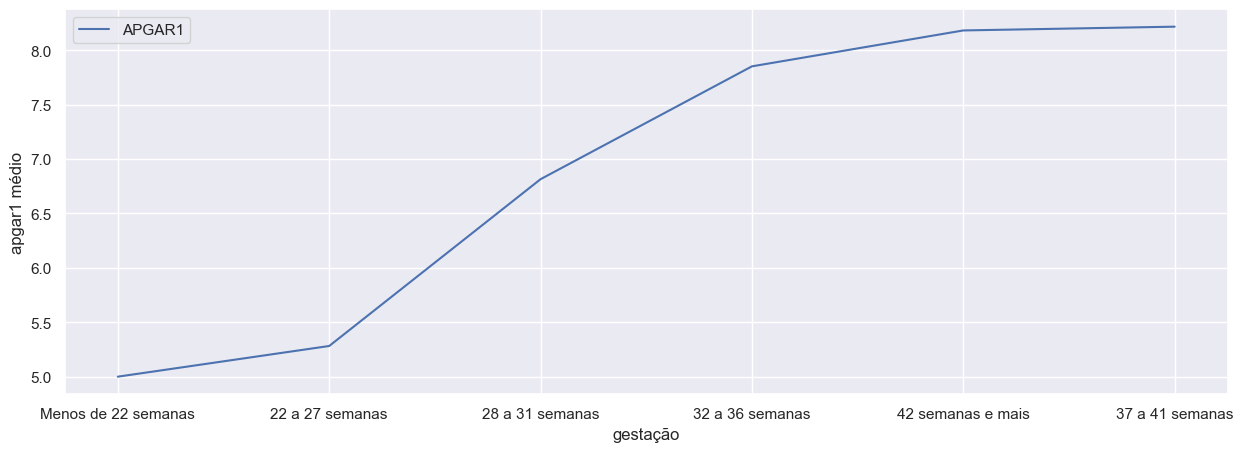

Diretório criado: 2019-05


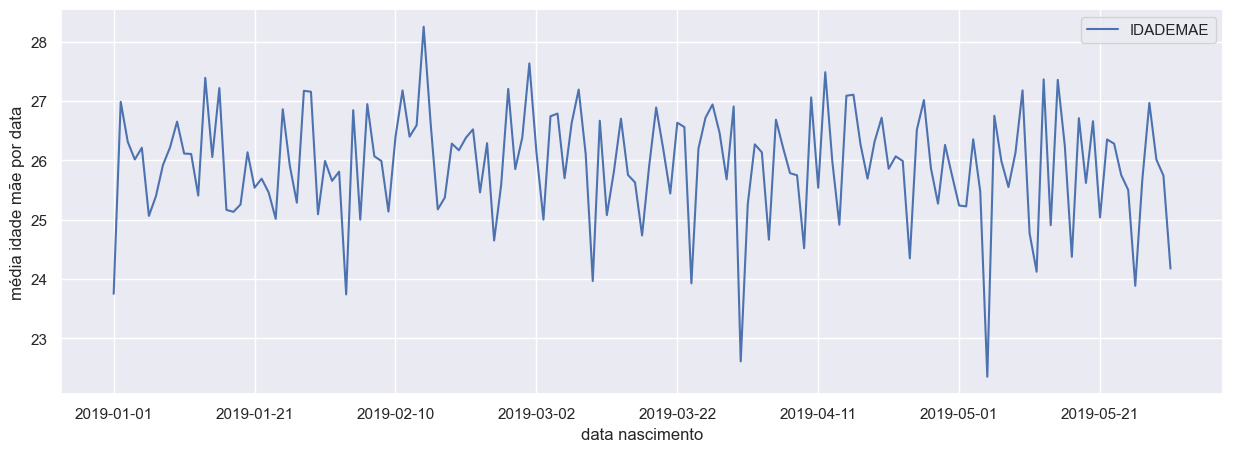

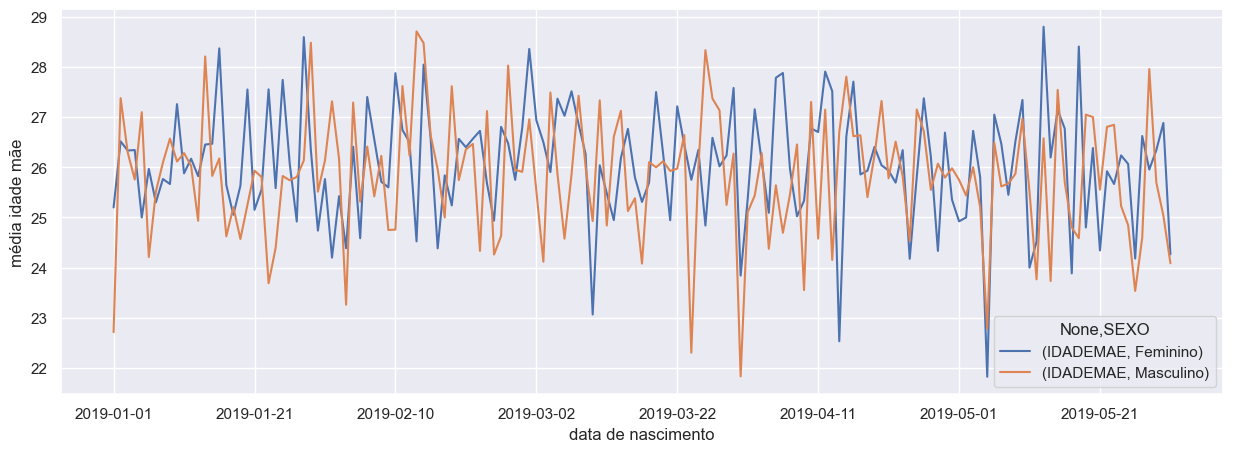

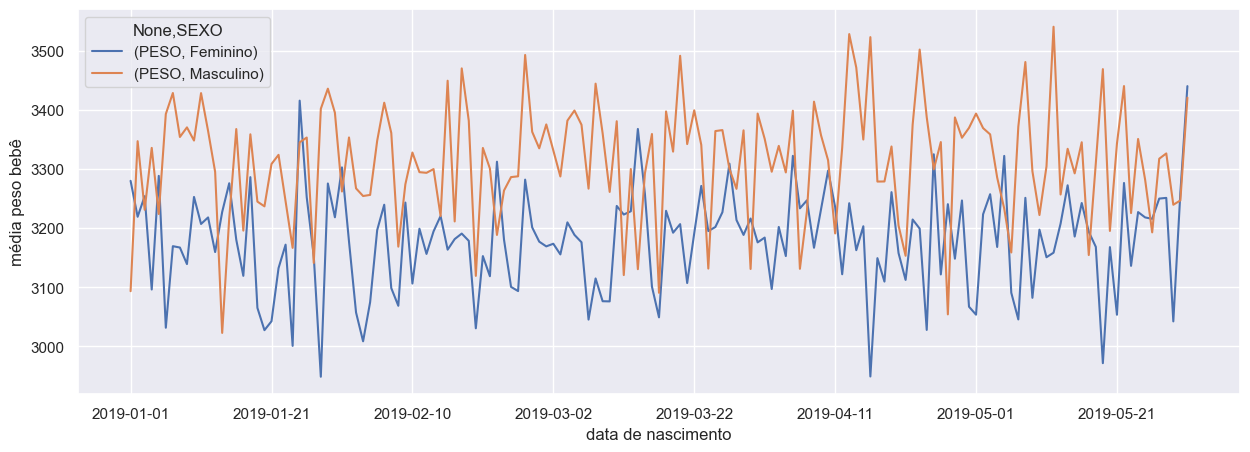

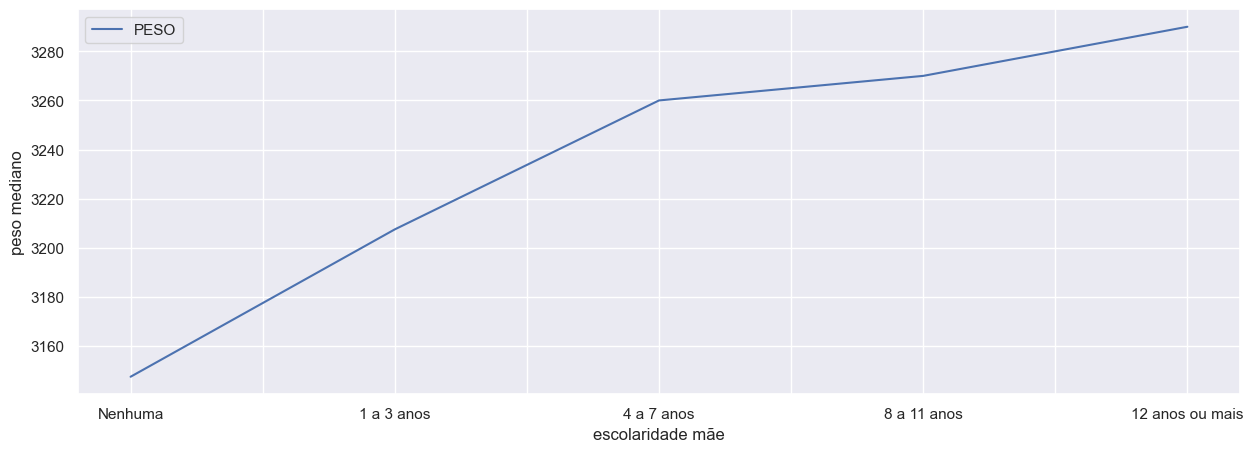

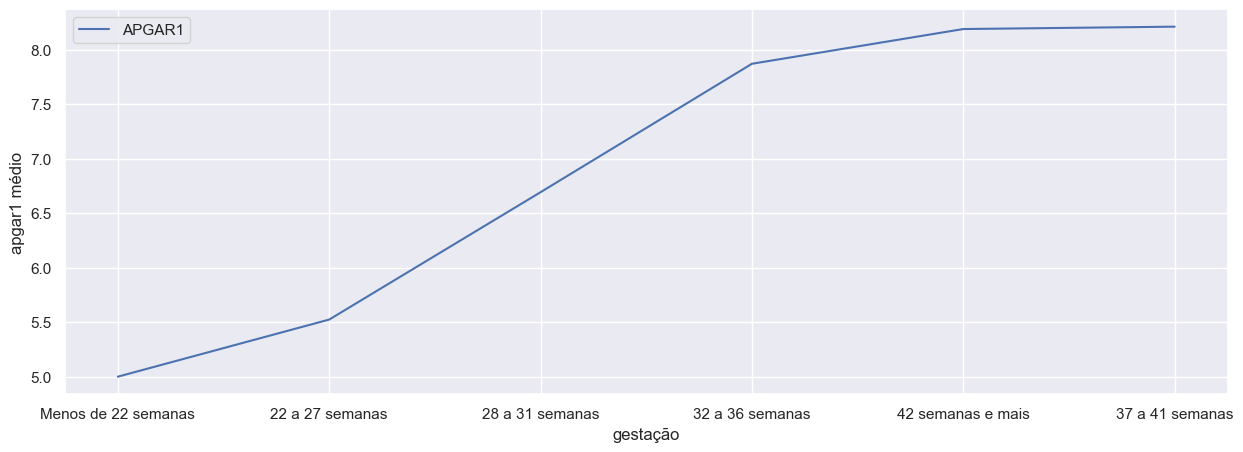

Diretório criado: 2019-06


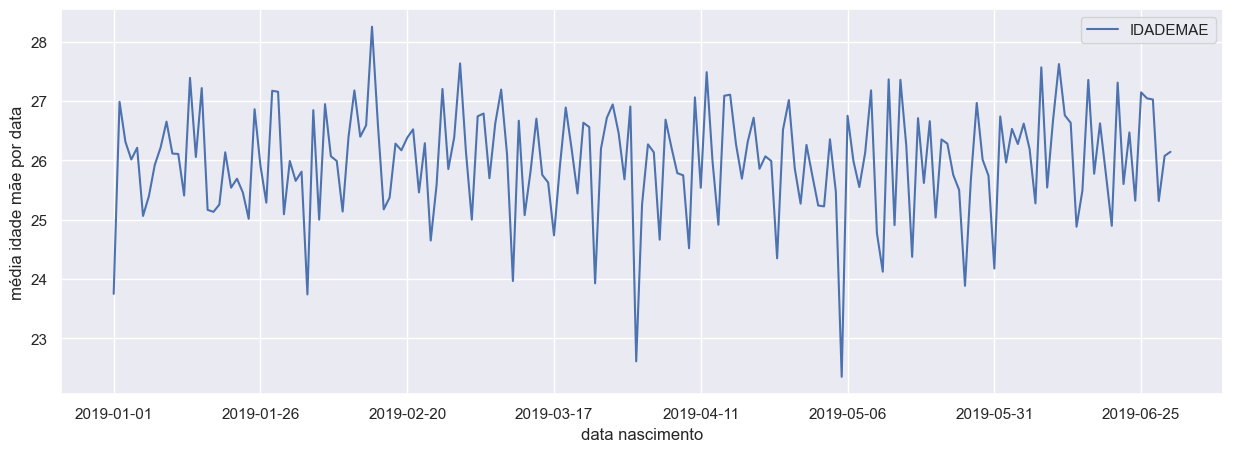

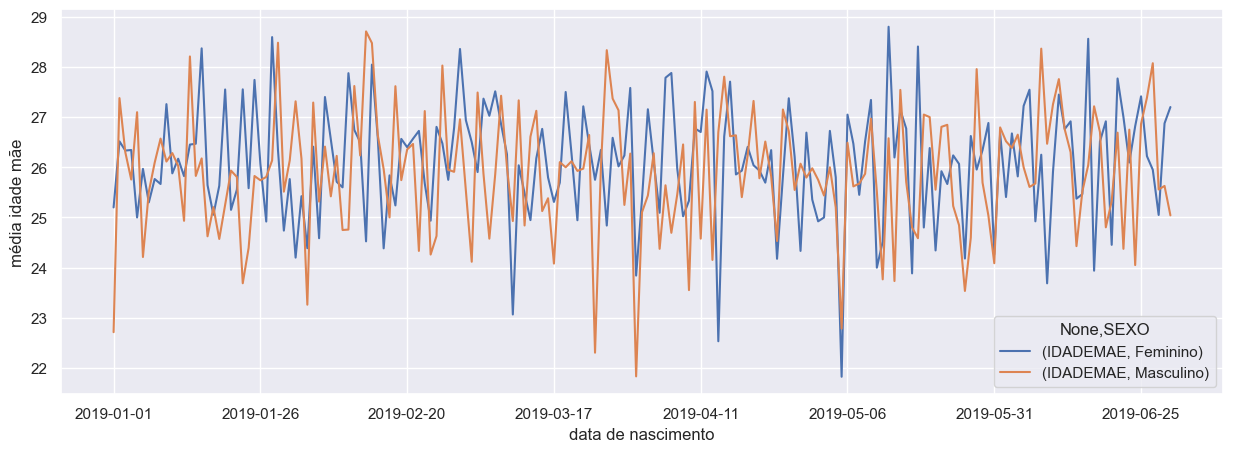

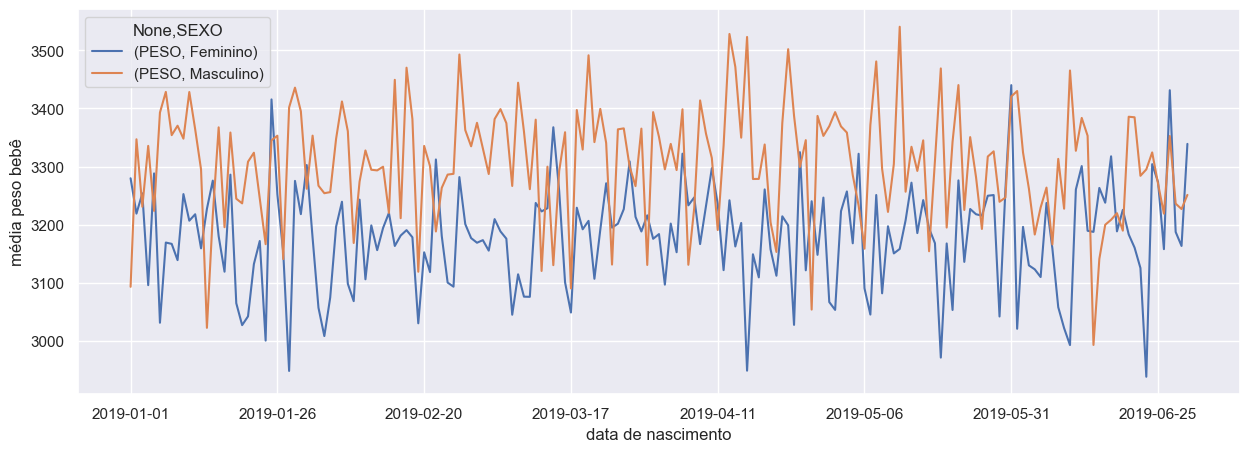

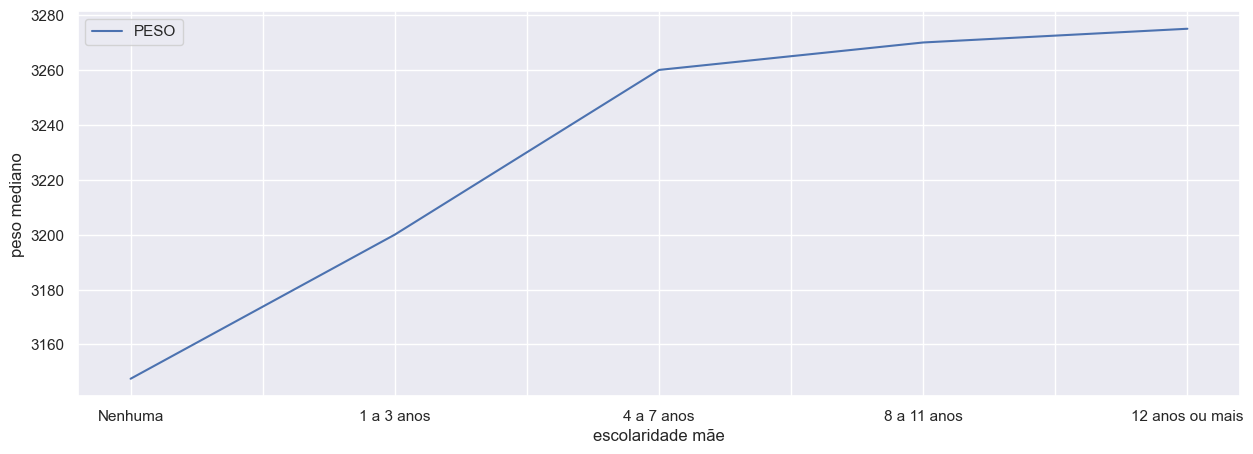

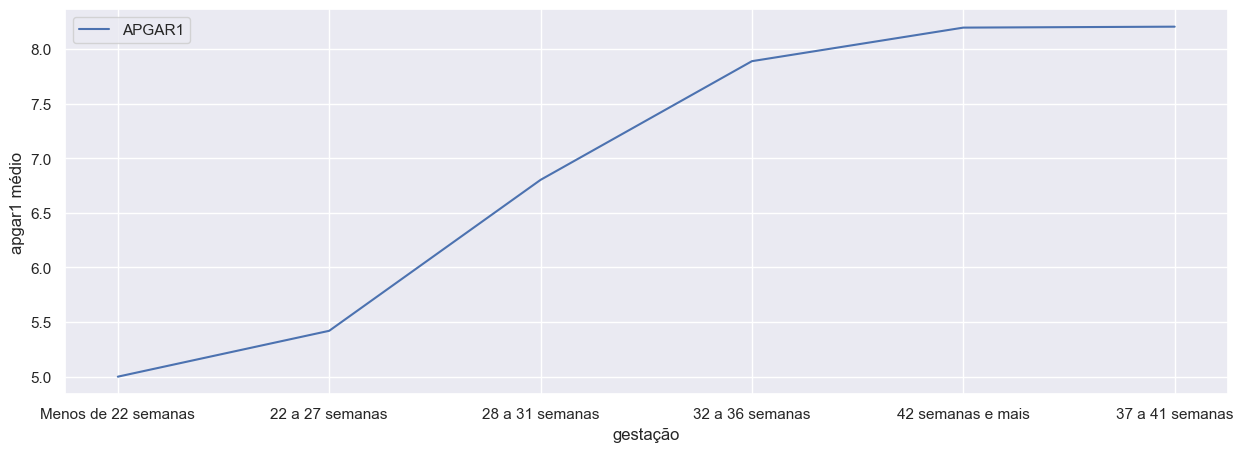

Diretório criado: 2019-07


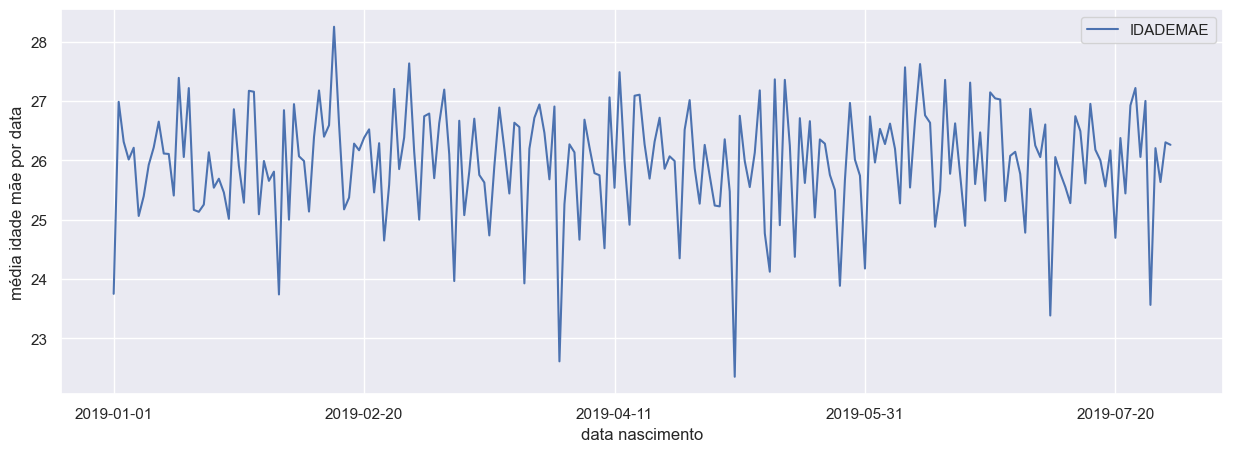

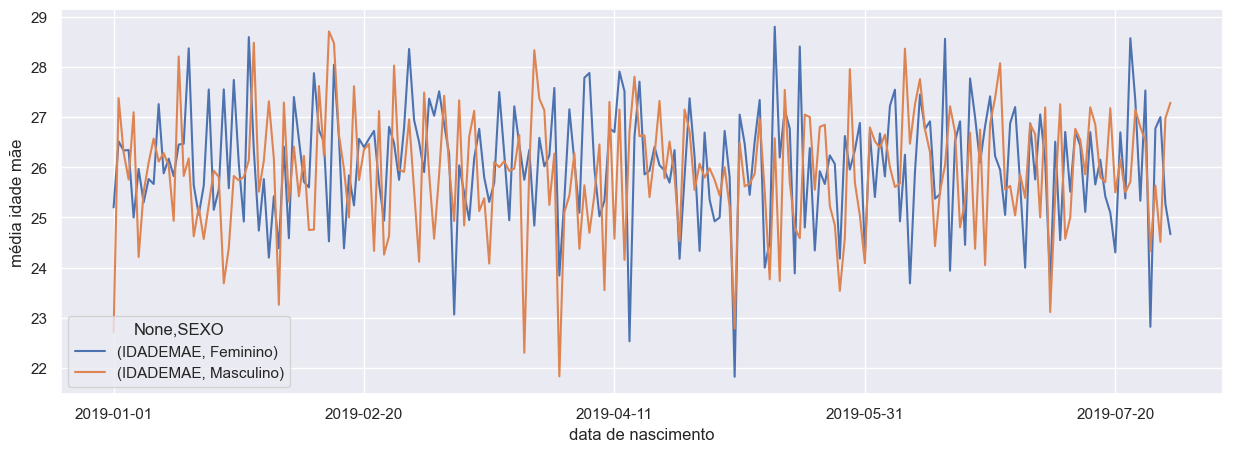

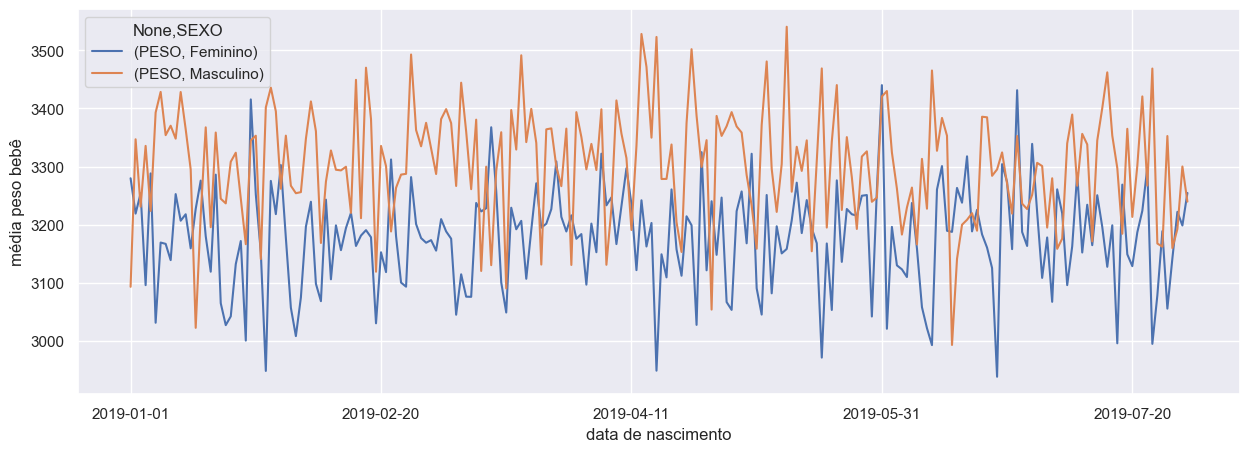

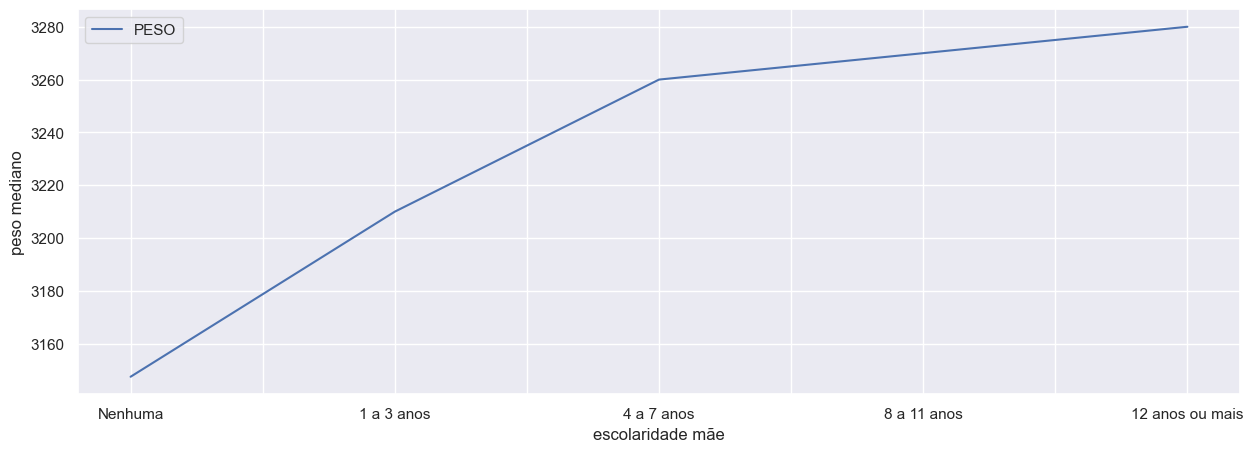

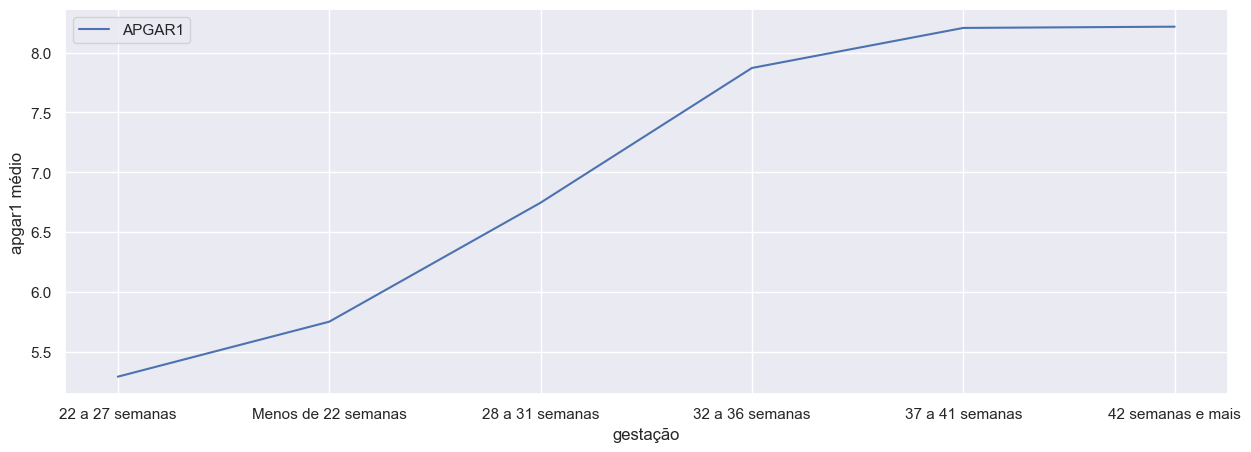

In [65]:
import sys
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sys.argv = ['gerar_analise.py', 'MAR', 'ABR', 'MAI', 'JUN', 'JUL']
sns.set()

MESES = {
    'JAN': '01',
    'FEV': '02',
    'MAR': '03',
    'ABR': '04',
    'MAI': '05',
    'JUN': '06',
    'JUL': '07',
    'AGO': '08',
    'SET': '09',
    'OUT': '10',
    'NOV': '11',
    'DEZ': '12'
}

ANO = '2019'

def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).unstack().plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index, aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

def gerar_analise_mes(abrev):
    mes_num = ABREVIACOES_MESES[abrev]
    mes_pasta = f"{ANO}-{mes_num}"
    os.makedirs(mes_pasta, exist_ok=True)
    print(f"Diretório criado: {mes_pasta}")

    arquivo_csv = f'./output/SINASC_RO_{ANO}_{abrev}.csv'

    try:
        df = pd.read_csv(arquivo_csv)
    except FileNotFoundError:
        print(f"Arquivo não encontrado: {arquivo_csv}. Pulando...")
        return

    plota_pivot_table(df, 'IDADEMAE', 'DTNASC', 'mean', 'média idade mãe por data', 'data nascimento')
    plt.show()
    plt.savefig(f'{mes_pasta}/media_idade_mae_por_data.png')
    plt.close()

    plota_pivot_table(df, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'média idade mãe', 'data de nascimento', 'unstack')
    plt.show()
    plt.savefig(f'{mes_pasta}/media_idade_mae_por_sexo.png')
    plt.close()

    plota_pivot_table(df, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'média peso bebê', 'data de nascimento', 'unstack')
    plt.show()
    plt.savefig(f'{mes_pasta}/media_peso_bebe_por_sexo.png')
    plt.close()

    plota_pivot_table(df, 'PESO', 'ESCMAE', 'median', 'peso mediano', 'escolaridade mãe', 'sort')
    plt.show()
    plt.savefig(f'{mes_pasta}/peso_mediano_por_escolaridade_mae.png')
    plt.close()

    plota_pivot_table(df, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 médio', 'gestação', 'sort')
    plt.show()
    plt.savefig(f'{mes_pasta}/media_apgar1_por_gestacao.png')
    plt.close()
abreviacoes = sys.argv[1:]

for abrev in abreviacoes:
    abrev = abrev.upper()
    if abrev not in ABREVIACOES_MESES:
        print(f"Aviso: abreviação inválida '{abrev}'. Ignorando...")
        continue
    gerar_analise_mes(abrev)
